In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
churn_data = pd.read_csv('data/churn.csv', sep=',')
churn_data.drop('RowNumber', axis=1, inplace=True)

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

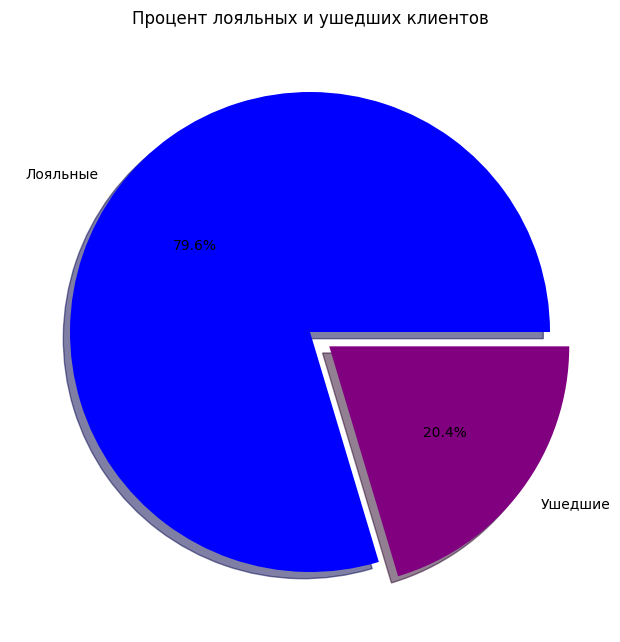

In [3]:
loyal = churn_data['Exited'].value_counts()

fig = plt.figure(figsize=(6,6))
axes = fig.add_axes([0,0,1,1])
axes.pie(loyal,
         labels= ['Лояльные', 'Ушедшие'], # устанавливаем метки
         autopct = '%.1f%%', # Будем отображать доли в процентах и округлять их до одного знака после запятой
         colors = ['Blue', 'Purple'], # устанавливаем жулаемые цвета
         explode = [0, 0.1], # второй сектор двигаем от центра на 10%
         shadow=True # Добавим тень
         )
axes.set_title('Процент лояльных и ушедших клиентов');



Из графика делаем вывод, что в банке, в основном лояльные клиенты, их количество почти в 4 раза больше, чем ушедших.

____________________________________________________________________________________________________________________________________________

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов.
     Опишите распределение и сделайте выводы.

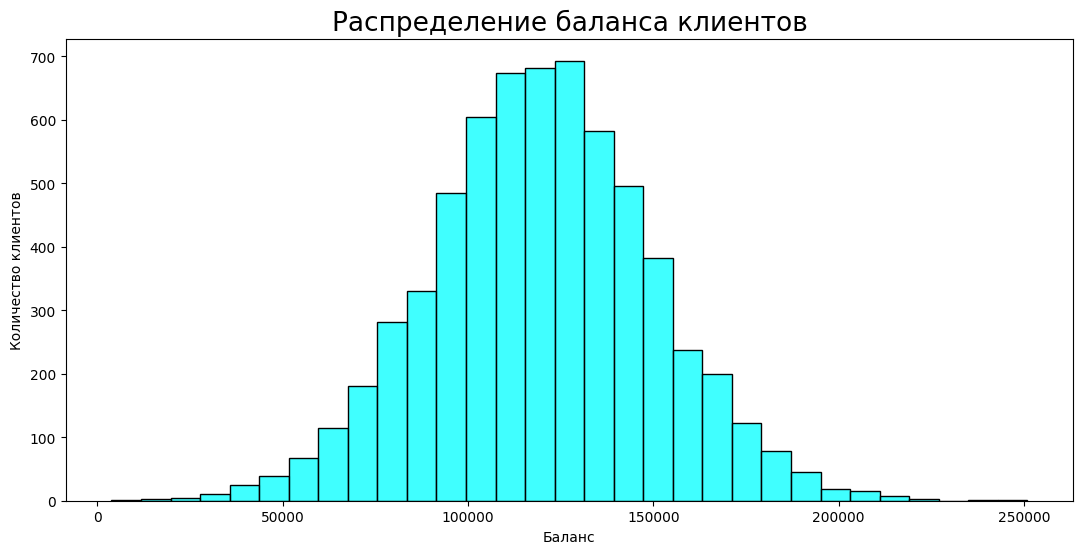

In [4]:
filt = churn_data[churn_data['Balance']>2500]
fig = plt.figure(figsize=[13,6])
hist = sns.histplot(data=filt,
                    x='Balance', # по оси х откладываем баланс
                    bins=31, # количество корзин
                    color='aqua' # меняем цвет
                    )
hist.set_ylabel('Количество клиентов') # метки для оси у
hist.set_xlabel('Баланс') # метки для оси х
hist.set_title('Распределение баланса клиентов', fontsize= 19); # название графика и размер его шрифта



На графике мы видим, что с ростом баланса, увеличивается количество клиентов, такая тенденция продолжается до 130 000, затем количество клиентов падает.
Основная масса клиентов нашего банка, это клиенты с балансом от 90 000 до 150 000 долларов. 

____________________________________________________________________________________________________________________________________________

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

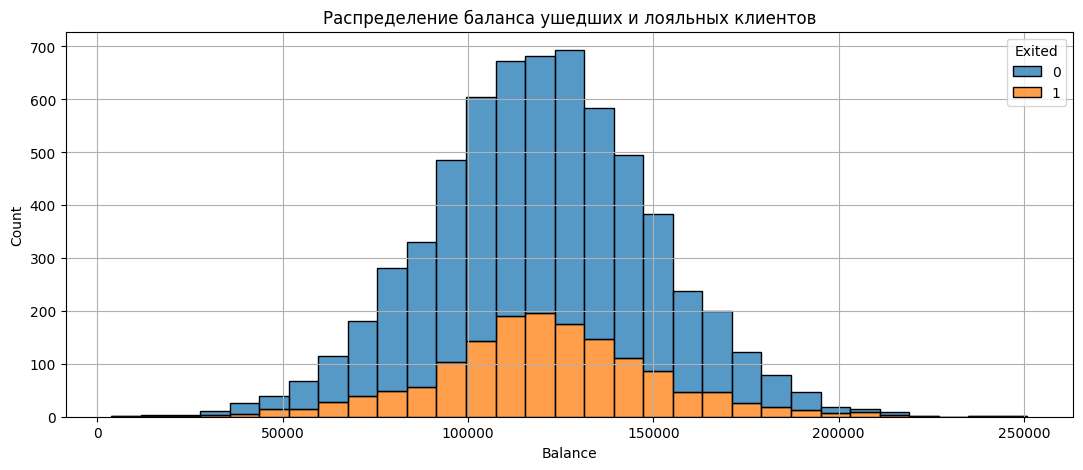

In [51]:
filt = churn_data[churn_data['Balance']>2500]
fig = plt.figure(figsize=[13,5])
hist = sns.histplot(data=filt,
                    x='Balance', # по оси х откладываем баланс
                    bins=31, # кол-во корзин
                    color='aqua',# устанавливаем цвет
                    hue='Exited', # многоуровневость, цвет отличается, в зависимости от категории клиента
                    multiple='stack'# складывает полосы, чтобы одна не пряталась за другую
                    )
hist.set_title('Распределение баланса ушедших и лояльных клиентов')
hist.grid()

На гистограмме мы видим, что наибольшее количество лояльных клиентов имеют баланс от 100 000 до 150 000, тогда как у ушедших клиентов более равномерно распределено количество, это говорит о том, что уходили клиенты с разным балансом, так же у ушедших более широкий диапазон по балансу. Мы видим, что все клиенты чей баланс был больше 225 000 долларов ушли, из чего мы можем предположить, что в банке есть проблемы с обслуживанием.

____________________________________________________________________________________________________________________________________________

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

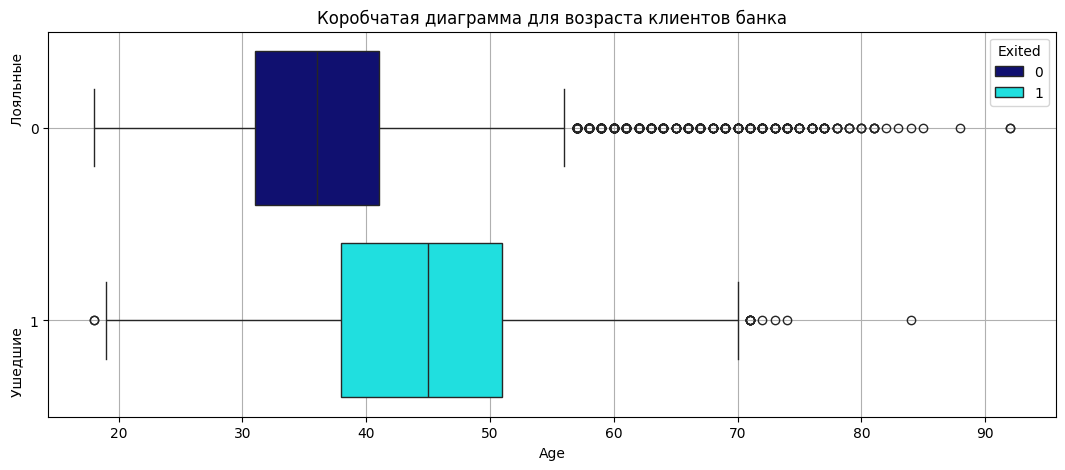

In [6]:
fig = plt.figure(figsize=(13,5))
box = sns.boxplot(
    data=churn_data,
    y='Exited', # по оси y - Лояльность
    x='Age', # по оси x - Возраст
    orient='h', # ориентация диаграммы горизониальная
    width=0.8, # ширина коробок
    hue = 'Exited', # чтобы цвет для каждой категории отличался 
    palette=['navy','aqua'] # выбираем цвета
)
box.set_ylabel('Ушедшие                                              Лояльные')
box.grid()
box.set_title('Коробчатая диаграмма для возраста клиентов банка');

В категории клиентов "Лояльные" значительно больше выбросов.
Банку стоит обратить внимание на людей более старшего поколения, так как в категории "Ушедшие" клиенты старше, их медианный возраст больше почти на 10 лет, а граница распределения на 15 лет. Делаем вывод, что людей более возрастных, что-то не устраивает в банке, возможно сложный и запутанный интерфейс.

____________________________________________________________________________________________________________________________________________

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

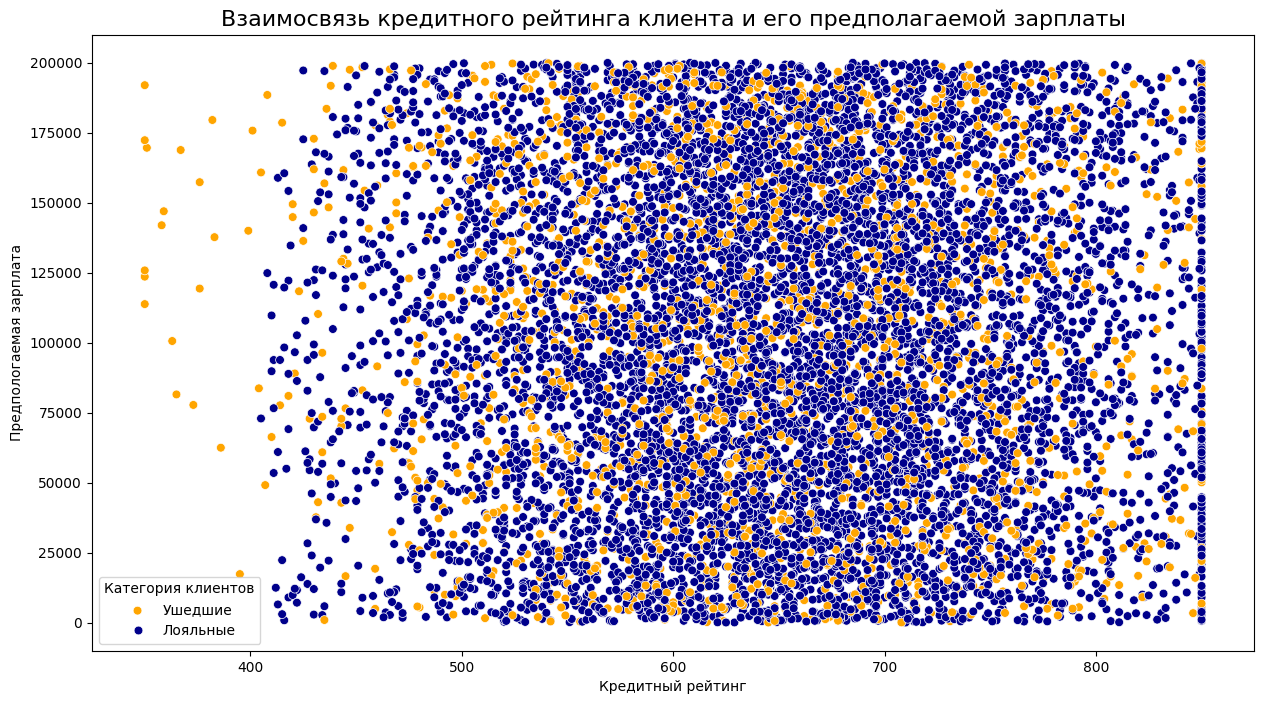

In [7]:

fig = plt.figure(figsize=(15, 8))
skat = sns.scatterplot(data=churn_data,
                       x='CreditScore', # по оси х кредитный рейтинг
                       y='EstimatedSalary', # по оси у зарплата
                       hue='Exited', # цвета по признаку оттока
                       palette=['darkblue','orange'], # цвета для маркеров
                       s=40) # размер маркеров
skat.set_xlabel('Кредитный рейтинг')
skat.set_ylabel('Предпологаемая зарплата')
skat.legend(title='Категория клиентов', labels=['Ушедшие', 'Лояльные'])
skat.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты', fontsize=16);

Отчетливой взаимозвязи между кредитным рейтингом и зарплатой клиента мы не видим, но в то же время наблюдаем, что клиенты с максимальным рейтингом, в основном лояльные клиенты, а все клиенты с рейтингом ниже 400 - это ушедшие клиенты.

____________________________________________________________________________________________________________________________________________

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

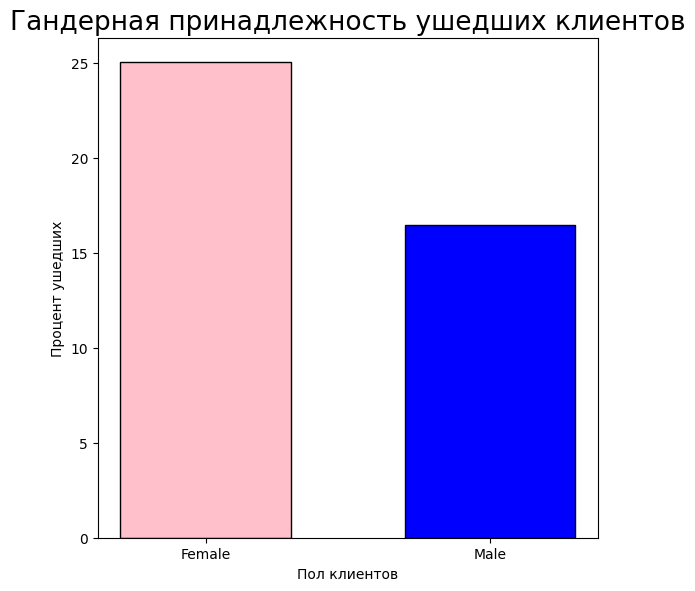

In [8]:
gender = churn_data.groupby('Gender')['Exited'].mean()*100 # группируем по полу, считаем среднее для столбца 'Exited'
fig = plt.figure(figsize=(5, 5)) # создаем фигуру
gender_bar = fig.add_axes([0,0,1,1]) # добавляем координатную плоскость
gender_bar.bar(x=gender.index, # по оси х индексы сгруппированной таблица(пол)
               height=gender, # высота столбцов, массив с данными
               width= 0.6, # ширина столбцов
               color=['pink', 'blue'], # цвета для столбцов
               edgecolor='black' # цвет окантовки столбцов
               )
gender_bar.set_ylabel('Процент ушедших')
gender_bar.set_xlabel('Пол клиентов')
gender_bar.set_title('Гандерная принадлежность ушедших клиентов', fontsize=19);

Женщин уходит больше.

____________________________________________________________________________________________________________________________________________

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

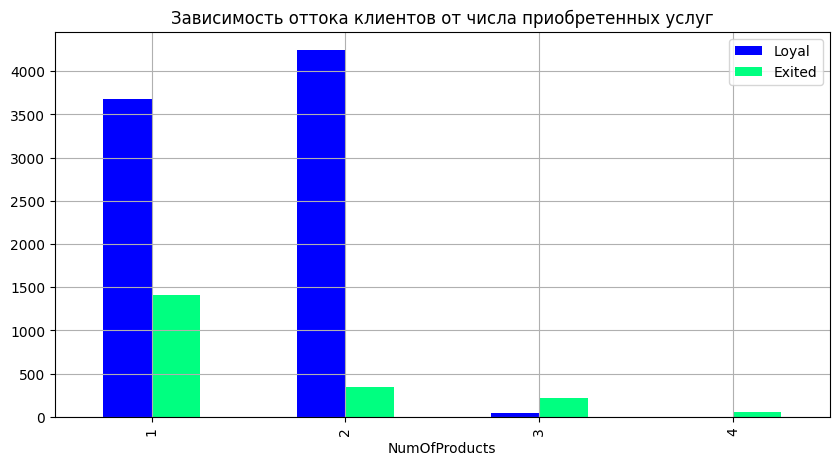

In [9]:
churn_data['Loyal'] = 1 - churn_data['Exited']
group_data = churn_data.groupby('NumOfProducts')[['Loyal', 'Exited']].sum()
fig = group_data.plot( # построим график с помощью метода plot()
    kind='bar', # вид графика - диаграмма
    grid=True, # сетка
    figsize=(10, 5), # размер
    title='Зависимость оттока клиентов от числа приобретенных услуг', # название графика
    colormap='winter' # цветовая палитра
    )

Примерно 30% ушедших среди клиентов с одним приобретенным продуктом, самый меленький процент среди клиентов с двумя продуктами, меньше 10%, с тремя продуктами подавляющее число клиентов уходит, больше 80%, а с четырьмя продуктами уходят вообще все клиенты.  

____________________________________________________________________________________________________________________________________________

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?



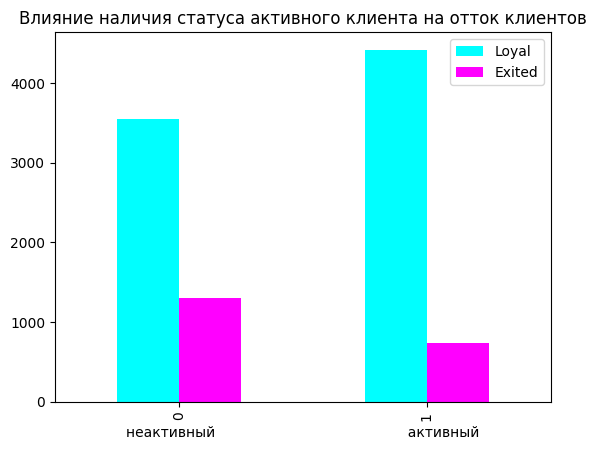

In [10]:
active = churn_data.groupby('IsActiveMember')[['Loyal', 'Exited']].sum() # строим сводную таблицу
fig = active.plot(kind='bar', # столбчатая диаграмма
                  title='Влияние наличия статуса активного клиента на отток клиентов', # название
                  xlabel='неактивный                                            активный', # нзвание для оси х
                  colormap='cool' # палитра 
                  )


Среди клиентов, обладающих статусом активного клиента, наблюдается меньший процент ушедших. Можно предложить банку ввести программу лояльности, если она есть, то улучшить ее, чтобы неактивным клиентам было выгодно перейти в статус активных.

____________________________________________________________________________________________________________________________________________

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [11]:
import plotly
import plotly.express as px

In [12]:
table = churn_data.groupby('Geography')[['Exited','Loyal']].mean()*100
fig = px.choropleth(
    data_frame=table, #DataFrame
    locations=table.index, #столбец с локациями(здесь это индексы)
    locationmode = 'country names', #режим сопоставления локаций с базой Plotly
    color='Exited',#от чего зависит цвет
    range_color=[0, 35], #диапазон цвета
    title='В какой стране доля ушедших больше', #заголовок
    width=900, #ширина
    height=600, #высота
    color_continuous_scale='Plasma', #палитра цветов
    hover_name=table.index
)
fig.show()

В Германии доля ушедших клиентов больше, это может быть связано с тем, что в Германии более стабильная экономика, в следствии чего больший уровень конкуренции среди банков, это стимулирует их предлагать более привлекательные условия для клиентов.

____________________________________________________________________________________________________________________________________________

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [13]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [28]:
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat) # создаем новый признак
churn_data['CreditScoreCat'] = churn_data['CreditScoreCat'].astype('category') # приводим к типу category

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

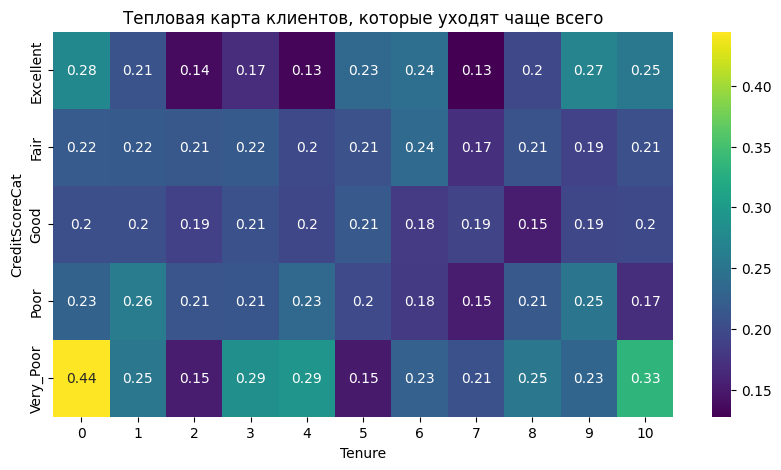

In [44]:
piv = churn_data.pivot_table(index='CreditScoreCat', columns='Tenure', values='Exited', aggfunc='mean') # строим сводную таблицу
fig = plt.figure(figsize=(10,5))
heatmap = sns.heatmap(data=piv, cmap='viridis', annot=True) # создаем тепловую карту, с помошью heatmap библиотеки seaborn
heatmap.set_title('Тепловая карта клиентов, которые уходят чаще всего'); # заголовок



Чаще всего уходят клиенты категории Very_Poor, которые пользуются услугами банка менее года, их 44%, а так же те, кто пользуется банком 10 лет, их 33%.
